In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('./data/education.csv')

df

,area,year,agegroup,age,sex,education,population,label
0,Japan,1900,1,0--4,1,e1,2846.842354,No Education
1,Japan,1900,2,5--9,1,e1,2426.950071,No Education
2,Japan,1900,3,10--14,1,e1,2248.676827,No Education
3,Japan,1900,4,15--19,1,e1,60.871278,No Education
4,Japan,1900,5,20--24,1,e1,76.092240,No Education
...,...,...,...,...,...,...,...,...
4867,Japan,2010,17,80--84,2,e6,133.016463,Post Secondary
4868,Japan,2010,18,85--89,2,e6,70.381671,Post Secondary
4869,Japan,2010,19,90--94,2,e6,24.835071,Post Secondary
4870,Japan,2010,20,95--99,2,e6,7.552709,Post Secondary


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        4872 non-null   object 
 1   year        4872 non-null   int64  
 2   agegroup    4872 non-null   int64  
 3   age         4872 non-null   object 
 4   sex         4872 non-null   int64  
 5   education   4872 non-null   object 
 6   population  4872 non-null   float64
 7   label       4872 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.6+ KB


In [50]:
test = df[df['agegroup'] >= 4]

In [49]:
df['sex'] = df['sex'].map({1: 'male', 2: 'female'})

df['sex']

0         male
1         male
2         male
3         male
4         male
         ...  
4867    female
4868    female
4869    female
4870    female
4871    female
Name: sex, Length: 4872, dtype: object

In [51]:
test

,area,year,agegroup,age,sex,education,population,label
3,Japan,1900,4,15--19,male,e1,60.871278,No Education
4,Japan,1900,5,20--24,male,e1,76.092240,No Education
5,Japan,1900,6,25--29,male,e1,84.758719,No Education
6,Japan,1900,7,30--34,male,e1,101.947109,No Education
7,Japan,1900,8,35--39,male,e1,116.069628,No Education
...,...,...,...,...,...,...,...,...
4867,Japan,2010,17,80--84,female,e6,133.016463,Post Secondary
4868,Japan,2010,18,85--89,female,e6,70.381671,Post Secondary
4869,Japan,2010,19,90--94,female,e6,24.835071,Post Secondary
4870,Japan,2010,20,95--99,female,e6,7.552709,Post Secondary


In [53]:
total = test.groupby(['year'])['population'].sum().reset_index()

total

,year,population
0,1900,29941.496738
1,1905,31652.467500
2,1910,33408.432146
3,1915,34915.448446
4,1920,35546.851000
5,1925,37812.777000
6,1930,40870.740000
7,1935,43708.981000
8,1940,46364.758000
9,1945,49261.900752


In [54]:
summed_gender = test.groupby(['year','agegroup', 'label'])['population'].sum().reset_index()

summed_gender

,year,agegroup,label,population
0,1900,4,No Education,517.081125
1,1900,4,Post Secondary,0.000000
2,1900,4,Primary,3003.755332
3,1900,4,Secondary,797.276872
4,1900,5,No Education,695.722017
...,...,...,...,...
2083,2010,21,Lower Secondary,16.024066
2084,2010,21,No Education,0.852915
2085,2010,21,Post Secondary,1.486034
2086,2010,21,Primary,14.348845


In [60]:
def get_total_pop(row):
    t = total.loc[total['year'] == row['year'], 'population'].values[0]
    return row['population'] / t * 100

summed_gender['percent'] = summed_gender[['year', 'population']].apply(get_total_pop, axis=1)

In [61]:
summed_gender.head(5)

,year,agegroup,label,population,percent
0,1900,4,No Education,517.081125,1.726972
1,1900,4,Post Secondary,0.000000,0.000000
2,1900,4,Primary,3003.755332,10.032081
3,1900,4,Secondary,797.276872,2.662782
4,1900,5,No Education,695.722017,2.323605


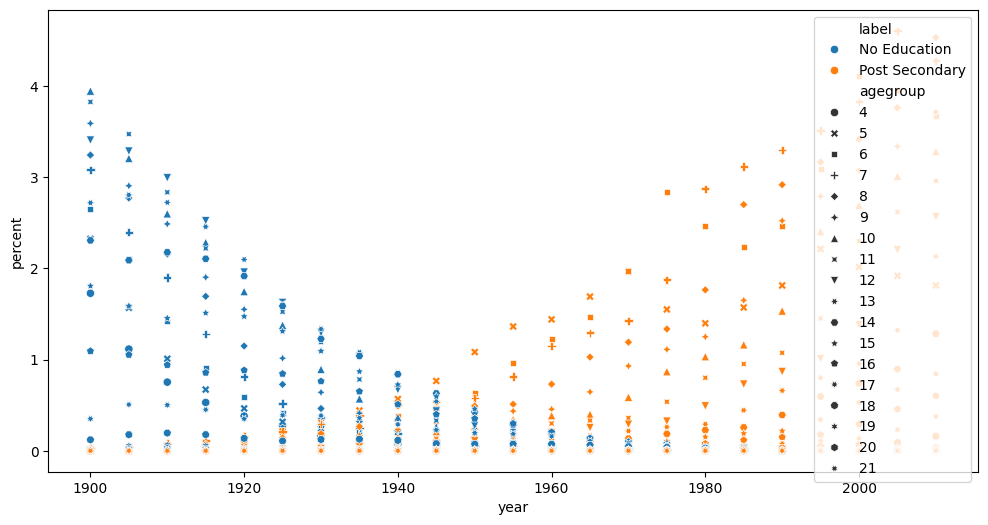

In [70]:
plt.figure(figsize=(12, 6));
sns.scatterplot(summed_gender[summed_gender['label'].isin(['No Education', 'Post Secondary'])], x='year', y='percent', hue='label', style='agegroup');

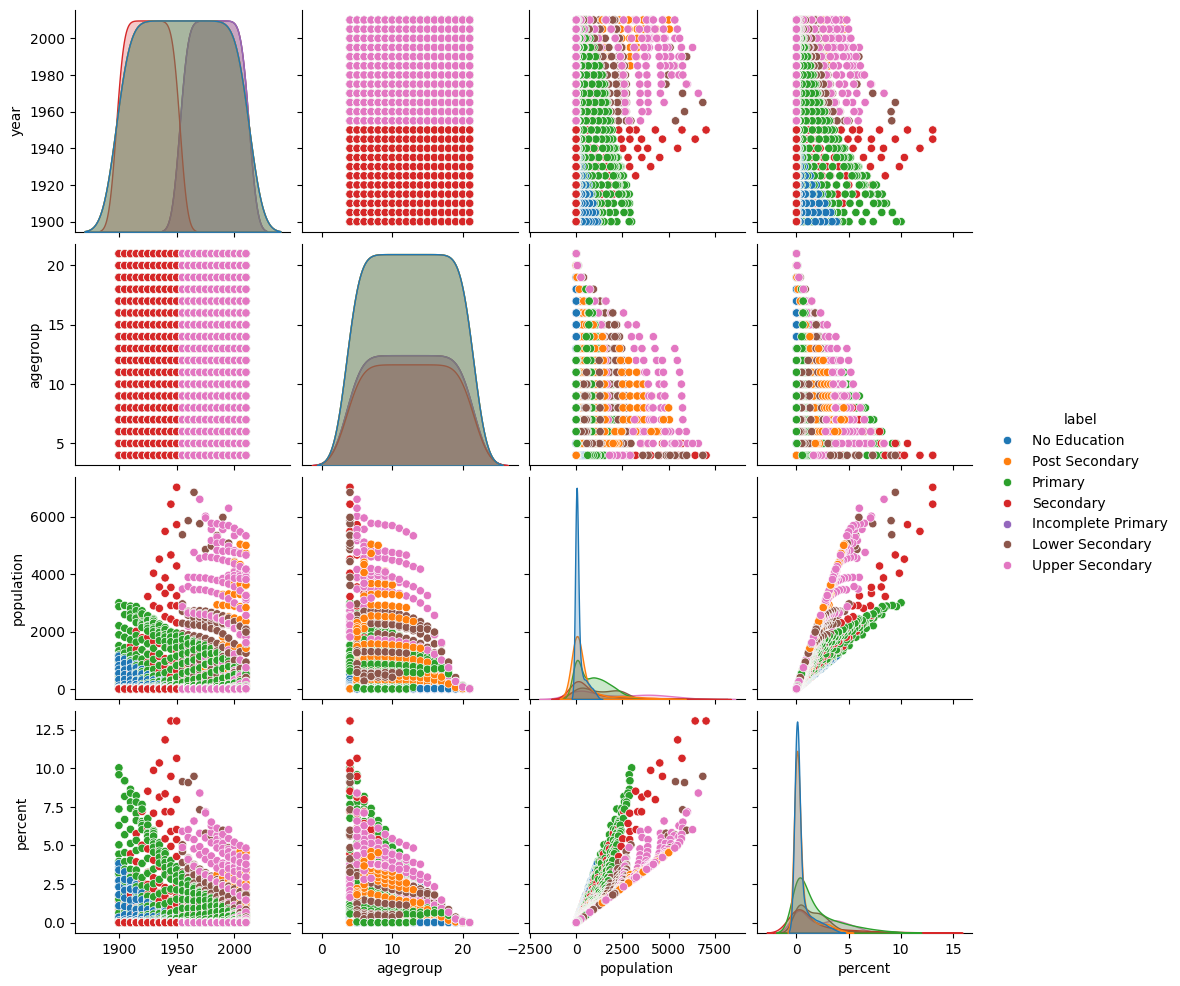

In [72]:
sns.pairplot(summed_gender, hue='label')

In [73]:
summed_gender

,year,agegroup,label,population,percent
0,1900,4,No Education,517.081125,1.726972
1,1900,4,Post Secondary,0.000000,0.000000
2,1900,4,Primary,3003.755332,10.032081
3,1900,4,Secondary,797.276872,2.662782
4,1900,5,No Education,695.722017,2.323605
...,...,...,...,...,...
2083,2010,21,Lower Secondary,16.024066,0.014515
2084,2010,21,No Education,0.852915,0.000773
2085,2010,21,Post Secondary,1.486034,0.001346
2086,2010,21,Primary,14.348845,0.012997


In [75]:
summed_age_gender = summed_gender.groupby(['year', 'label'])[['population', 'percent']].sum().reset_index()

summed_age_gender

,year,label,population,percent
0,1900,No Education,10844.078224,36.217556
1,1900,Post Secondary,23.257838,0.077678
2,1900,Primary,16719.193281,55.839537
3,1900,Secondary,2354.967394,7.865229
4,1905,No Education,9851.492264,31.123931
...,...,...,...,...
111,2010,Lower Secondary,19456.642643,17.623908
112,2010,No Education,136.260277,0.123425
113,2010,Post Secondary,35641.017024,32.283781
114,2010,Primary,4293.045332,3.888658


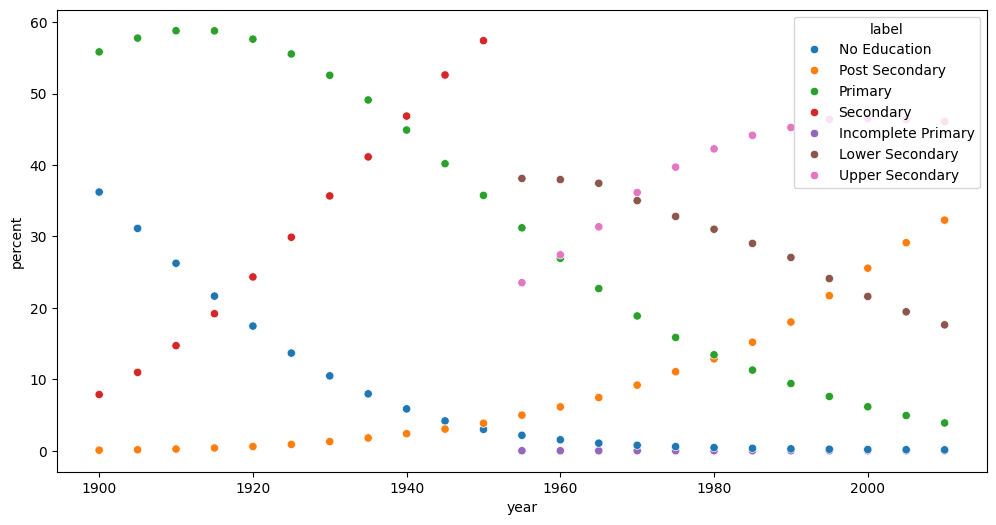

In [76]:
plt.figure(figsize=(12, 6));
sns.scatterplot(summed_age_gender, x='year', y='percent', hue='label');

In [77]:
summed_age_gender

,year,label,population,percent
0,1900,No Education,10844.078224,36.217556
1,1900,Post Secondary,23.257838,0.077678
2,1900,Primary,16719.193281,55.839537
3,1900,Secondary,2354.967394,7.865229
4,1905,No Education,9851.492264,31.123931
...,...,...,...,...
111,2010,Lower Secondary,19456.642643,17.623908
112,2010,No Education,136.260277,0.123425
113,2010,Post Secondary,35641.017024,32.283781
114,2010,Primary,4293.045332,3.888658


In [82]:
b = summed_age_gender.loc[summed_age_gender['year'] == 2000, 'percent' ]

b.sum()

np.float64(100.0)

In [88]:
summed_age = test.groupby(['year','label', 'sex'])['population'].sum().reset_index()

summed_age

,year,label,sex,population
0,1900,No Education,female,9006.222856
1,1900,No Education,male,1837.855369
2,1900,Post Secondary,female,5.368365
3,1900,Post Secondary,male,17.889474
4,1900,Primary,female,4807.776630
...,...,...,...,...
227,2010,Post Secondary,male,18364.265981
228,2010,Primary,female,2442.985797
229,2010,Primary,male,1850.059535
230,2010,Upper Secondary,female,26757.494794


In [90]:
total_genders = test.groupby(['year', 'sex'])['population'].sum().reset_index()

total_genders.head(5)


,year,sex,population
0,1900,female,14843.706535
1,1900,male,15097.790203
2,1905,female,15696.405816
3,1905,male,15956.061684
4,1910,female,16563.060362


In [94]:
def get_percent_gender(row):
    t = total_genders.loc[(total_genders['year'] == row['year']) & (total_genders['sex'] == row['sex']), 'population'].values[0]
    return row['population'] / t * 100

summed_age['percent'] = summed_age[['year', 'sex', 'population']].apply(get_percent_gender, axis=1)


In [97]:
summed_age.head(10)

,year,label,sex,population,percent
0,1900,No Education,female,9006.222856,60.673679
1,1900,No Education,male,1837.855369,12.173009
2,1900,Post Secondary,female,5.368365,0.036166
3,1900,Post Secondary,male,17.889474,0.118491
4,1900,Primary,female,4807.776630,32.389327
5,1900,Primary,male,11911.416651,78.895100
6,1900,Secondary,female,1024.338684,6.900828
7,1900,Secondary,male,1330.628710,8.813400
8,1905,No Education,female,8292.110020,52.828081
9,1905,No Education,male,1559.382244,9.772977


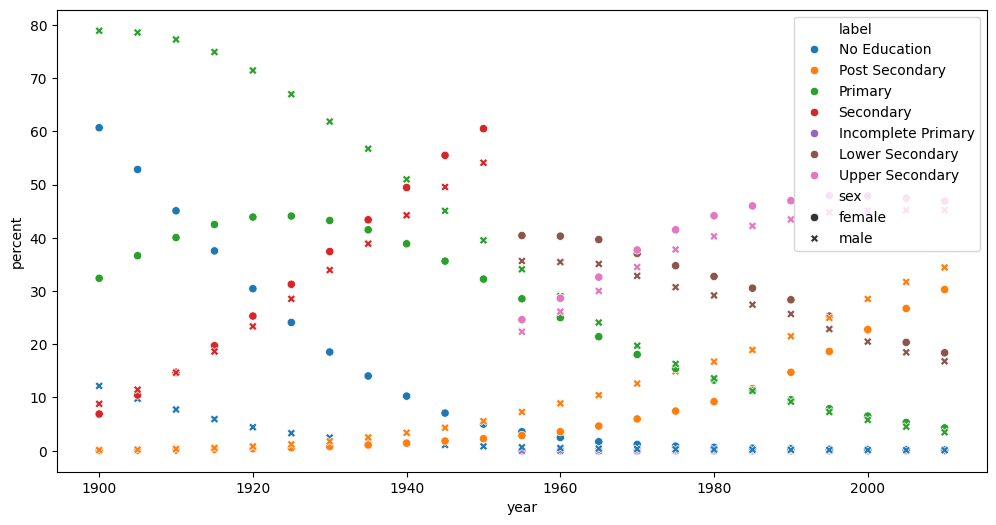

In [99]:
plt.figure(figsize=(12, 6));
sns.scatterplot(summed_age, x='year', y='percent', hue='label', style='sex');

In [96]:
summed_age_gender

,year,label,population,percent
0,1900,No Education,10844.078224,36.217556
1,1900,Post Secondary,23.257838,0.077678
2,1900,Primary,16719.193281,55.839537
3,1900,Secondary,2354.967394,7.865229
4,1905,No Education,9851.492264,31.123931
...,...,...,...,...
111,2010,Lower Secondary,19456.642643,17.623908
112,2010,No Education,136.260277,0.123425
113,2010,Post Secondary,35641.017024,32.283781
114,2010,Primary,4293.045332,3.888658


In [ ]:
pivoted = summed_age_gender.pivot(index='year', columns='label', values='percent')
pivoted = pivoted.reset_index()

In [103]:
pivoted

label,year,Incomplete Primary,Lower Secondary,No Education,Post Secondary,Primary,Secondary,Upper Secondary
0,1900,NaN,NaN,36.217556,0.077678,55.839537,7.865229,NaN
1,1905,NaN,NaN,31.123931,0.137067,57.770766,10.968236,NaN
2,1910,NaN,NaN,26.247187,0.236540,58.803364,14.712910,NaN
3,1915,NaN,NaN,21.647524,0.382686,58.786248,19.183543,NaN
4,1920,NaN,NaN,17.452955,0.590669,57.627954,24.328422,NaN
5,1925,NaN,NaN,13.670664,0.884729,55.553492,29.891116,NaN
6,1930,NaN,NaN,10.481608,1.279510,52.565380,35.673502,NaN
7,1935,NaN,NaN,7.962212,1.790953,49.109618,41.137216,NaN
8,1940,NaN,NaN,5.857279,2.389425,44.899420,46.853876,NaN
9,1945,NaN,NaN,4.171540,3.031628,40.188994,52.607837,NaN


In [111]:
pivot = summed_age.pivot(index='year', columns=['label', 'sex'], values='percent')
pivot.columns = [f'{label}_{sex}' for label, sex in pivot.columns]
pivot = pivot.reset_index()

In [112]:
pivot = pivot.drop(columns = ['Incomplete Primary_female', 'Incomplete Primary_male'])

In [113]:
pivot

,year,No Education_female,No Education_male,Post Secondary_female,Post Secondary_male,Primary_female,Primary_male,Secondary_female,Secondary_male,Lower Secondary_female,Lower Secondary_male,Upper Secondary_female,Upper Secondary_male
0,1900,60.673679,12.173009,0.036166,0.118491,32.389327,78.895100,6.900828,8.813400,NaN,NaN,NaN,NaN
1,1905,52.828081,9.772977,0.074577,0.198540,36.636685,78.560929,10.460657,11.467554,NaN,NaN,NaN,NaN
2,1910,45.070201,7.739627,0.141059,0.330420,40.042395,77.249917,14.746344,14.680036,NaN,NaN,NaN,NaN
3,1915,37.535247,5.940838,0.239367,0.524371,42.493941,74.892906,19.731445,18.641885,NaN,NaN,NaN,NaN
4,1920,30.432944,4.416979,0.376434,0.805829,43.889907,71.425257,25.300715,23.351935,NaN,NaN,NaN,NaN
5,1925,24.091625,3.298181,0.558526,1.209415,44.084059,66.969568,31.265790,28.522836,NaN,NaN,NaN,NaN
6,1930,18.539998,2.470398,0.794207,1.761972,43.246524,61.829677,37.419271,33.937953,NaN,NaN,NaN,NaN
7,1935,14.038503,1.877912,1.082525,2.500316,41.500939,56.728328,43.378034,38.893444,NaN,NaN,NaN,NaN
8,1940,10.255928,1.413111,1.421733,3.367130,38.879993,50.981138,49.442346,44.238620,NaN,NaN,NaN,NaN
9,1945,7.074649,1.074963,1.821456,4.322450,35.618486,45.064091,55.485409,49.538497,NaN,NaN,NaN,NaN


In [115]:
merge = pd.merge(pivoted, pivot, how='inner', on='year')

In [117]:
merge = merge.drop(columns='Incomplete Primary')

In [121]:
merge.to_csv('./data/education.csv', header=True, index=False, encoding='utf-8')

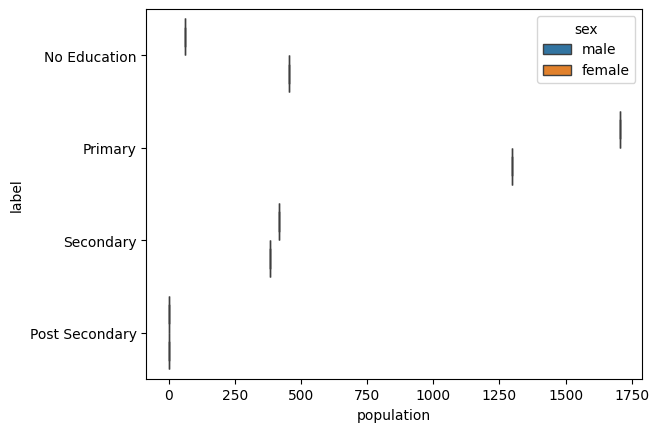

In [27]:
sns.boxplot(test, x='population', y='label', hue='sex');